In [1]:

import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
from code import aprox_inverse_problem as aprox 

direct_problem was imported
inverse_problem was imported
aprox_inverse_problem was imported


In [2]:
path_to_experimental_data='./experimental_data/BURM7.EXP'
f=open(path_to_experimental_data)
path_to_AB_MN_data=('./experimental_data/'+f.readline()).strip()
f.close()
dat = np.genfromtxt(path_to_experimental_data, comments= '$' , skip_header = 3)
experimental_rhoa = dat.T[2] # измеренные кажущиеся сопротивления
stt=np.genfromtxt(path_to_AB_MN_data,comments= '$')
AB2 = stt.T[0] # Полуразнос

In [7]:
N_layers_list=[5] # список из количества слоёв в моделях
exp_data=np.array([AB2, experimental_rhoa]).T # Данные
inverse=aprox.aprox_inverse_problem_solver(N_layers_list, exp_data) 
results=inverse[0] # модели полученные из обратной задачи 
ind=inverse[1] #  индекс модели с наименьшим loss_N_layers в results
print(ind)

0


In [8]:
#Вывод количества слоёв в модели, её параметров и полученной ошибки
for i in range (len(N_layers_list)):
    print('\nnumber of layers= ', N_layers_list[i],' \nparam =',results[i].x,'\nloss =',results[i].fun)


number of layers=  5  
param = [146.35050516   8.76012822  48.65208829  27.52960332 140.80684453
  31.11169201 133.85464863  16.43469966 471.35989961] 
loss = 18.679554275380756


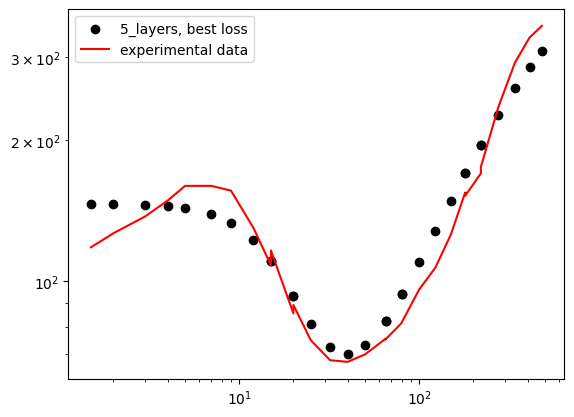

In [9]:
# Визуализация
for i in range(len(N_layers_list)):
    if i==ind:
        plt.scatter(AB2,aprox.aprox_rhoa(AB2, results[i].x), c='black',label=f'{N_layers_list[i]}_layers, best loss')
    else: plt.loglog(AB2,aprox.aprox_rhoa(AB2, results[i].x), label=f'{N_layers_list[i]}_layers')
plt.loglog(AB2,experimental_rhoa,c='red', label='experimental data')
plt.legend()